## Problem Statement

The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. While creating the project, try to follow the instructions below and make sure that the project is unique.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

#### Univariate Analysis

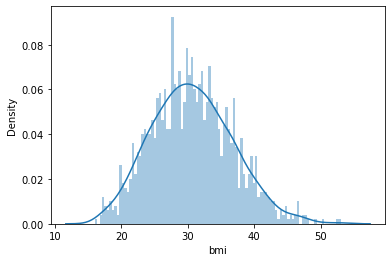

In [5]:
# Distribution of bmi

sns.distplot(df['bmi'],bins=100,kde=True)
plt.show()

#Observation: bmi is normally distributed around 30

#### Bivariate Analysis

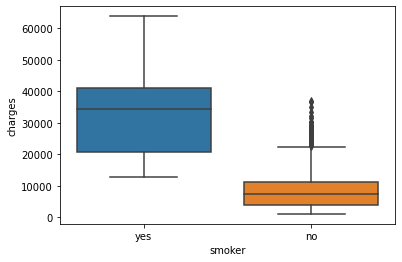

In [6]:
# relationship between “smoker” and “charges”

sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.show()

# Observation: The charges of health insurance are higher for smokers

<AxesSubplot:xlabel='smoker', ylabel='Count'>

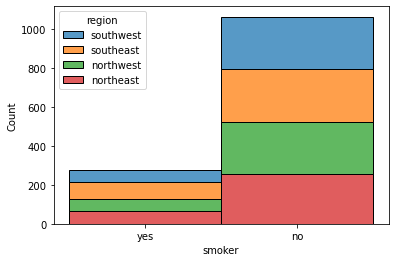

In [7]:
# relationship between “smoker” and “region”

sns.histplot(binwidth=0.5, x="smoker", hue="region", data=df, stat="count", multiple="stack")

# Observation: The number of smokers are less compared to non-smokers across region

<AxesSubplot:xlabel='sex', ylabel='bmi'>

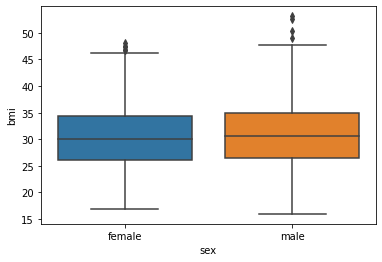

In [8]:
# relationship between “bmi” and “sex”.

sns.boxplot(x = 'sex', y = 'bmi', data = df)

# Observation: The boxplot shows that there is no impact of bmi on age as both have similar median bmi

In [9]:
# "region" with the most "children"
df_plot = df.groupby('region').agg({'children': 'sum'}).reset_index().rename(columns={'region':'Region', 'children': 'Number of Children'})
df_plot

,Region,Number of Children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


[Text(0, 0, '339'), Text(0, 0, '373'), Text(0, 0, '382'), Text(0, 0, '371')]

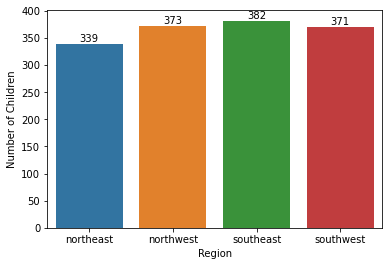

In [10]:
plot = sns.barplot( x = 'Region', y = 'Number of Children', data = df_plot)
plot.bar_label(plot.containers[0])

# Observation: From the plot it is evident that most of the children are from "South-East" region

<AxesSubplot:xlabel='age', ylabel='bmi'>

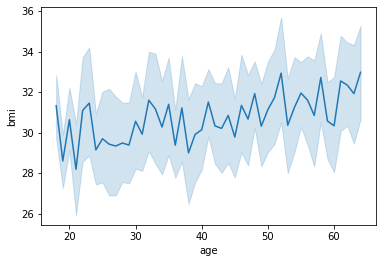

In [11]:
# relationship between “age” and “bmi”

sns.lineplot(x = 'age', y = 'bmi', data = df)

# Observation: There is a slight increase in bmi with age

<AxesSubplot:xlabel='children', ylabel='bmi'>

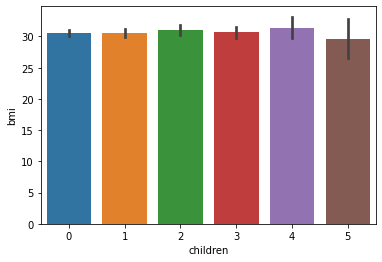

In [12]:
# relationship between “bmi” and “children”

sns.barplot(x = 'children', y = 'bmi', data = df)

# Observation: The number of a children of a person does not impact on his/her bmi

<AxesSubplot:xlabel='bmi'>

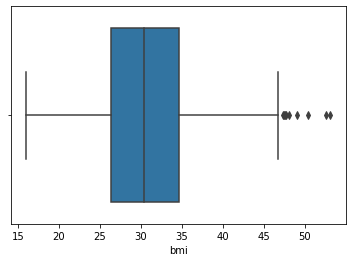

In [13]:
# outlier in the "bmi" variable?

sns.boxplot(x = df['bmi'])

#Observation: Outliers exist for 'bmi' variable as evident from boxplot below

<AxesSubplot:xlabel='bmi', ylabel='charges'>

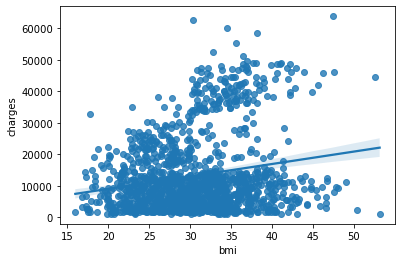

In [14]:
# relationship between “bmi” and “charges”

sns.regplot(x = 'bmi', y = 'charges', data = df)

# Observation: There doesn't seem to be any relationship between “bmi” and “charges”

<AxesSubplot:xlabel='region', ylabel='bmi'>

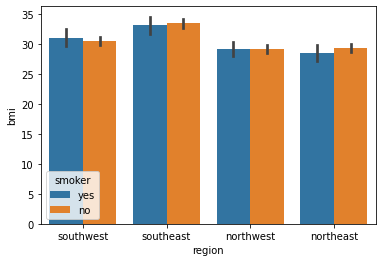

In [15]:
# relationship between “region”, “smoker” and “bmi” using bar plot

sns.barplot(x = 'region', y = 'bmi', hue = 'smoker', data = df)

# Observation: The bmi in southeast region is highest for both smokers and non-smokers. However across the regions there 
# does not seem to be significant difference in bmi due to smoking habit

### Data Preprocessing

In [16]:
df['sex'] = df['sex'].replace({'female':1,'male':0})
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [18]:
reg_df = pd.get_dummies(df['region'], drop_first = True)
reg_df.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [19]:
df = pd.concat([df, reg_df], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,1,0,0


In [20]:
df = df.drop('region', 1)
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


#### Splitting into train and test

In [22]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [23]:
print(df_train.shape)
print(df_test.shape)

(936, 9)
(402, 9)


#### Rescaling the Features

In [24]:
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['age', 'bmi', 'children', 'charges']

# Fit on train data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
966,0.717391,0,0.237692,0.4,1,0.364661,1,0,0
522,0.717391,1,0.483051,0.0,0,0.139579,0,0,0
155,0.565217,0,0.633844,0.0,0,0.093008,1,0,0
671,0.239130,1,0.408932,0.0,0,0.045040,0,0,0
1173,0.434783,0,0.357815,0.4,0,0.085173,1,0,0


In [25]:
df_train.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.458171,0.502137,0.399088,0.220513,0.194444,0.192301,0.244658,0.282051,0.242521
std,0.306065,0.500263,0.167115,0.241223,0.395984,0.193690,0.430114,0.450239,0.428837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.277441,0.000000,0.000000,0.055033,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.391176,0.200000,0.000000,0.129662,0.000000,0.000000,0.000000
75%,0.717391,1.000000,0.512039,0.400000,0.000000,0.245247,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Transform the test data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
12,0.108696,0,0.496099,0.0,0,0.011253,0,0,1
306,0.217391,1,0.310465,0.4,0,0.304170,0,0,1
318,0.565217,1,0.314366,0.0,0,0.100550,1,0,0
815,0.043478,1,0.417003,0.0,0,0.012068,0,1,0
157,0.000000,0,0.247915,0.0,1,0.229795,0,0,0


In [27]:
df_test.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.467662,0.477612,0.387383,0.215423,0.228856,0.197677,0.238806,0.248756,0.243781
std,0.304236,0.500121,0.156621,0.241072,0.420620,0.192579,0.426885,0.432831,0.429897
min,0.000000,0.000000,0.023002,0.000000,0.000000,0.000154,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278585,0.000000,0.000000,0.060686,0.000000,0.000000,0.000000
50%,0.478261,0.000000,0.383105,0.200000,0.000000,0.138259,0.000000,0.000000,0.000000
75%,0.733696,1.000000,0.483051,0.400000,0.000000,0.254641,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.890503,1.000000,1.000000,0.940158,1.000000,1.000000,1.000000


### Model Selection

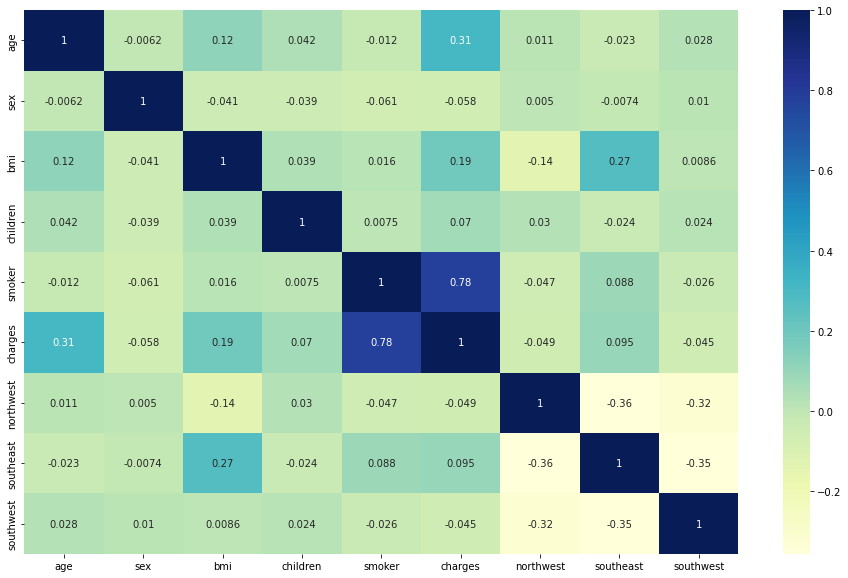

In [28]:
# Heatmap

plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [29]:
# X_train, y_train

y_train = df_train.pop('charges')
X_train = df_train

In [30]:
y_train

966     0.364661
522     0.139579
155     0.093008
671     0.045040
1173    0.085173
          ...   
802     0.015662
53      0.584542
350     0.170933
79      0.086980
792     0.025700
Name: charges, Length: 936, dtype: float64

In [31]:
# Create an object using the LinearRegression() class
lr = LinearRegression()

# Create an object using the RidgeClassifier() class
rv = RidgeCV()

# Create an object using the DecisionTreeRegressor() class
dt = DecisionTreeRegressor()

# Create an object using the RandomForestRegressor() class
rf = RandomForestRegressor()

# Create an object using the MLPRegressor() class
nlp = MLPRegressor()

In [32]:
# Train the Logistic Classifier model
lr.fit(X_train, y_train)

# Train the Ridge Classifier model
rv.fit(X_train, y_train)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Train the Random forest model
rf.fit(X_train, y_train)

# Train the Neural Network model
nlp.fit(X_train, y_train)

MLPRegressor()

In [33]:
# Make prediction using the train dataset on Linear Regression model
lr_train_pred = lr.predict(X_train)

# Make prediction using the train dataset on Ridge Regression model
rv_train_pred = rv.predict(X_train)

# Make prediction using the train dataset on Decision Tree Regression model
dt_train_pred = dt.predict(X_train)

# Make prediction using the train dataset on Random Forest Regression model
rf_train_pred = rf.predict(X_train)

# Make prediction using the train dataset on Neural Network Regression model
nlp_train_pred = nlp.predict(X_train)

In [34]:
# Calculate residual for Linear Regression model
lr_train_res = y_train - lr_train_pred

# Calculate residual for Ridge Regression model
rv_train_res = y_train, rv_train_pred

# Calculate residual for Decision Tree Regression model
dt_train_res = y_train- dt_train_pred

# Calculate residual for Random Forest Regression model
rf_train_res = y_train- rf_train_pred

# Calculate residual for Neural Network Regression model
nlp_train_res = y_train- nlp_train_pred

In [35]:
# Evaluate for Linear Regression model
print('***** Linear Regression *****')
print('R2 Score: ',r2_score(y_true = y_train, y_pred = lr_train_pred))
print('RMSE value: ', mean_squared_error(y_train, lr_train_pred, squared=False))
print('')

# Evaluate for Ridge Regression model
print('***** Ridge Regression *****')
print('R2 Score: ',r2_score(y_true = y_train, y_pred = rv_train_pred))
print('RMSE value: ', mean_squared_error(y_train, rv_train_pred, squared=False))
print('')

# Evaluate for Decision Tree Regression model
print('***** Decision Tree Regression *****')
print('R2 Score: ',r2_score(y_true = y_train, y_pred = dt_train_pred))
print('RMSE value: ', mean_squared_error(y_train, dt_train_pred, squared=False))
print('')

# Evaluate for Random Forest Regression model
print('***** Random Forest Regression *****')
print('R2 Score: ',r2_score(y_true = y_train, y_pred = rf_train_pred))
print('RMSE value: ', mean_squared_error(y_train, rf_train_pred, squared=False))
print('')

# Evaluate for Neural Network Regression model
print('***** Neural Network Regression *****')
print('R2 Score: ',r2_score(y_true = y_train, y_pred = nlp_train_pred))
print('RMSE value: ', mean_squared_error(y_train, nlp_train_pred, squared=False))

***** Linear Regression *****
R2 Score:  0.7378638257001523
RMSE value:  0.09911483202457173

***** Ridge Regression *****
R2 Score:  0.7378630830655089
RMSE value:  0.09911497242117287

***** Decision Tree Regression *****
R2 Score:  0.9986693373529103
RMSE value:  0.0070616982148494455

***** Random Forest Regression *****
R2 Score:  0.9743103437289234
RMSE value:  0.031028038206414216

***** Neural Network Regression *****
R2 Score:  0.7553634806379537
RMSE value:  0.09574934579840932


<AxesSubplot:xlabel='charges', ylabel='Density'>

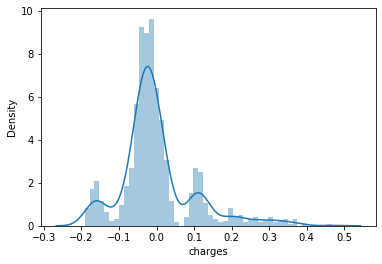

In [36]:
# Print the report of the Linear Regression model

sns.distplot(lr_train_res)

<AxesSubplot:ylabel='Density'>

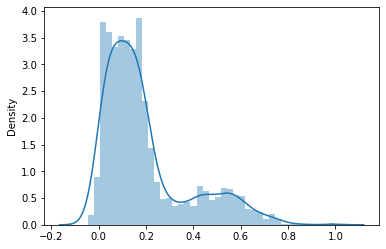

In [37]:
# Print the report of the Ridge Regression model

sns.distplot(rv_train_res)

<AxesSubplot:xlabel='charges', ylabel='Density'>

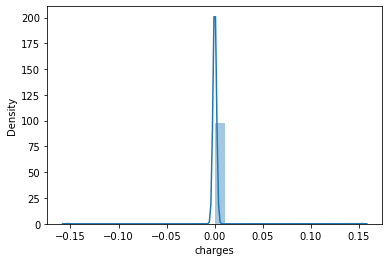

In [38]:
# Print the report of the Decision Tree Regression model

sns.distplot(dt_train_res)

<AxesSubplot:xlabel='charges', ylabel='Density'>

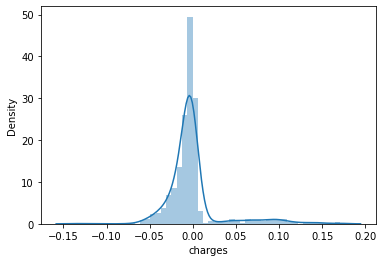

In [39]:
# Print the report of the Random Forest Regression model

sns.distplot(rf_train_res)

<AxesSubplot:xlabel='charges', ylabel='Density'>

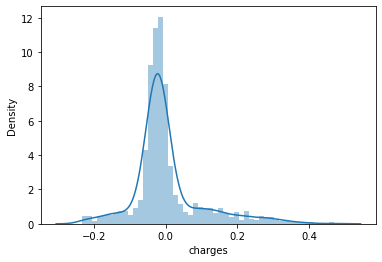

In [40]:
# Print the report of the Neural Network Regression model

sns.distplot(nlp_train_res)

In [41]:
# X-test, y_test

y_test = df_test.pop('charges')
X_test = df_test

In [42]:
# Make prediction using the train dataset on Linear Regression model
lr_test_pred = lr.predict(X_test)

# Make prediction using the train dataset on Ridge Regression model
rv_test_pred = rv.predict(X_test)

# Make prediction using the train dataset on Decision Tree Regression model
dt_test_pred = dt.predict(X_test)

# Make prediction using the train dataset on Random Forest Regression model
rf_test_pred = rf.predict(X_test)

# Make prediction using the train dataset on Neural Network Regression model
nlp_test_pred = nlp.predict(X_test)

In [43]:
# Calculate residual for Linear Regression model
lr_test_res = y_test - lr_test_pred

# Calculate residual for Ridge Regression model
rv_test_res = y_test- rv_test_pred

# Calculate residual for Decision Tree Regression model
dt_test_res = y_test- dt_test_pred

# Calculate residual for Random Forest Regression model
rf_test_res = y_test- rf_test_pred

# Calculate residual for Neural Network Regression model
nlp_test_res = y_test- nlp_test_pred

In [44]:
# Evaluate for Linear Regression model
print('***** Linear Regression *****')
print('R2 Score: ',r2_score(y_true = y_test, y_pred = lr_test_pred))
print('RMSE value: ', mean_squared_error(y_test, lr_test_pred, squared=False))

print('')

# Evaluate for Ridge Regression model
print('***** Ridge Regression *****')
print('R2 Score: ',r2_score(y_true = y_test, y_pred = rv_test_pred))
print('RMSE value: ', mean_squared_error(y_test, rv_test_pred, squared=False))
print('')

# Evaluate for Decision Tree Regression model
print('***** Decision Tree Regression *****')
print('R2 Score: ',r2_score(y_true = y_test, y_pred = dt_test_pred))
print('RMSE value: ', mean_squared_error(y_test, dt_test_pred, squared=False))
print('')

# Evaluate for Random Forest Regression model
print('***** Random Forest Regression *****')
print('R2 Score: ',r2_score(y_true = y_test, y_pred = rf_test_pred))
print('RMSE value: ', mean_squared_error(y_test, rf_test_pred, squared=False))
print('')

# Evaluate for Neural Network Regression model
print('***** Neural Network Regression *****')
print('R2 Score: ',r2_score(y_true = y_test, y_pred = nlp_test_pred))
print('RMSE value: ', mean_squared_error(y_test, nlp_test_pred, squared=False))

***** Linear Regression *****
R2 Score:  0.7772310511733103
RMSE value:  0.09078124384422025

***** Ridge Regression *****
R2 Score:  0.777174043039605
RMSE value:  0.09079285887912458

***** Decision Tree Regression *****
R2 Score:  0.7074684552428157
RMSE value:  0.10402917478283244

***** Random Forest Regression *****
R2 Score:  0.8594203518382302
RMSE value:  0.07211573384054801

***** Neural Network Regression *****
R2 Score:  0.7693561642962476
RMSE value:  0.09237186818442587


#### Observation:
From the above analysis we can see that "Decision Tree" and "Random Forest" are giving better results than rest of the models. However due to issue of overfitting the test results are varying greatly from train results. However the performance seems to be better incase of "Random Forest". Hence we will proceed further with "Random Forest" for hyperparameter tuning to resolve the issue of overfitting and get an optimised model.

### Hyperparameter Tuning

#### Random Forest using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [50, 60, 70], 'max_features': [5, 10, 20], 
 'max_depth': [5, 10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [5, 10, 50, None],
                          'max_features': [5, 10, 20],
                          'n_estimators': [50, 60, 70]}],
             scoring='neg_mean_squared_error')

In [46]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=50)

In [47]:
y_train_pred = grid_search_forest.best_estimator_.predict(X_train)
y_test_pred = grid_search_forest.best_estimator_.predict(X_test)

In [48]:
#RMSE
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print('Train R2 Score: ', r2_score(y_train, y_train_pred))
print('Train MSE: ',train_mse)
print('Train RMSE: ', train_rmse)

Train R2 Score:  0.8749840481729949
Train MSE:  0.004685066648840147
Train RMSE:  0.06844754669701572


In [49]:
#RMSE
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print('Test R2 Score: ', r2_score(y_test, y_test_pred))
print('Test MSE: ',test_mse)
print('Test RMSE: ', test_rmse)

Test R2 Score:  0.8919634203358965
Test MSE:  0.003996763299064461
Test RMSE:  0.06321995965725113


#### Feature Importance

In [50]:
# extract the numerical values of feature importance from the grid search
importances = grid_search_forest.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X_train.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

   importance    feature
0    0.709215     smoker
1    0.146055        bmi
2    0.124747        age
3    0.009250   children
4    0.003820  southeast
5    0.003371  southwest
6    0.002030        sex
7    0.001511  northwest


### Conclusions
1. The rate of a health insurance is highly dependent on the smoking behaviour of a person.
2. The final model has a R2 score of 88 percentage which is good.
3. We have chosen Random Forest as it was performing better on test data without any hyperparameter tuning.
4. There is still scope of improvement to this model as we have not added any derived features like "age group" etc.